In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import time

import batt_cycle

In [5]:
data_file = '../Data/Li-Li/Data_2_21_19/PI-B_data.pickle'
sample_data = pickle.load(open(data_file, 'rb'))
sample, sample_indeces = sample_data
sample['time_hours'] = sample['time_sec']/3600

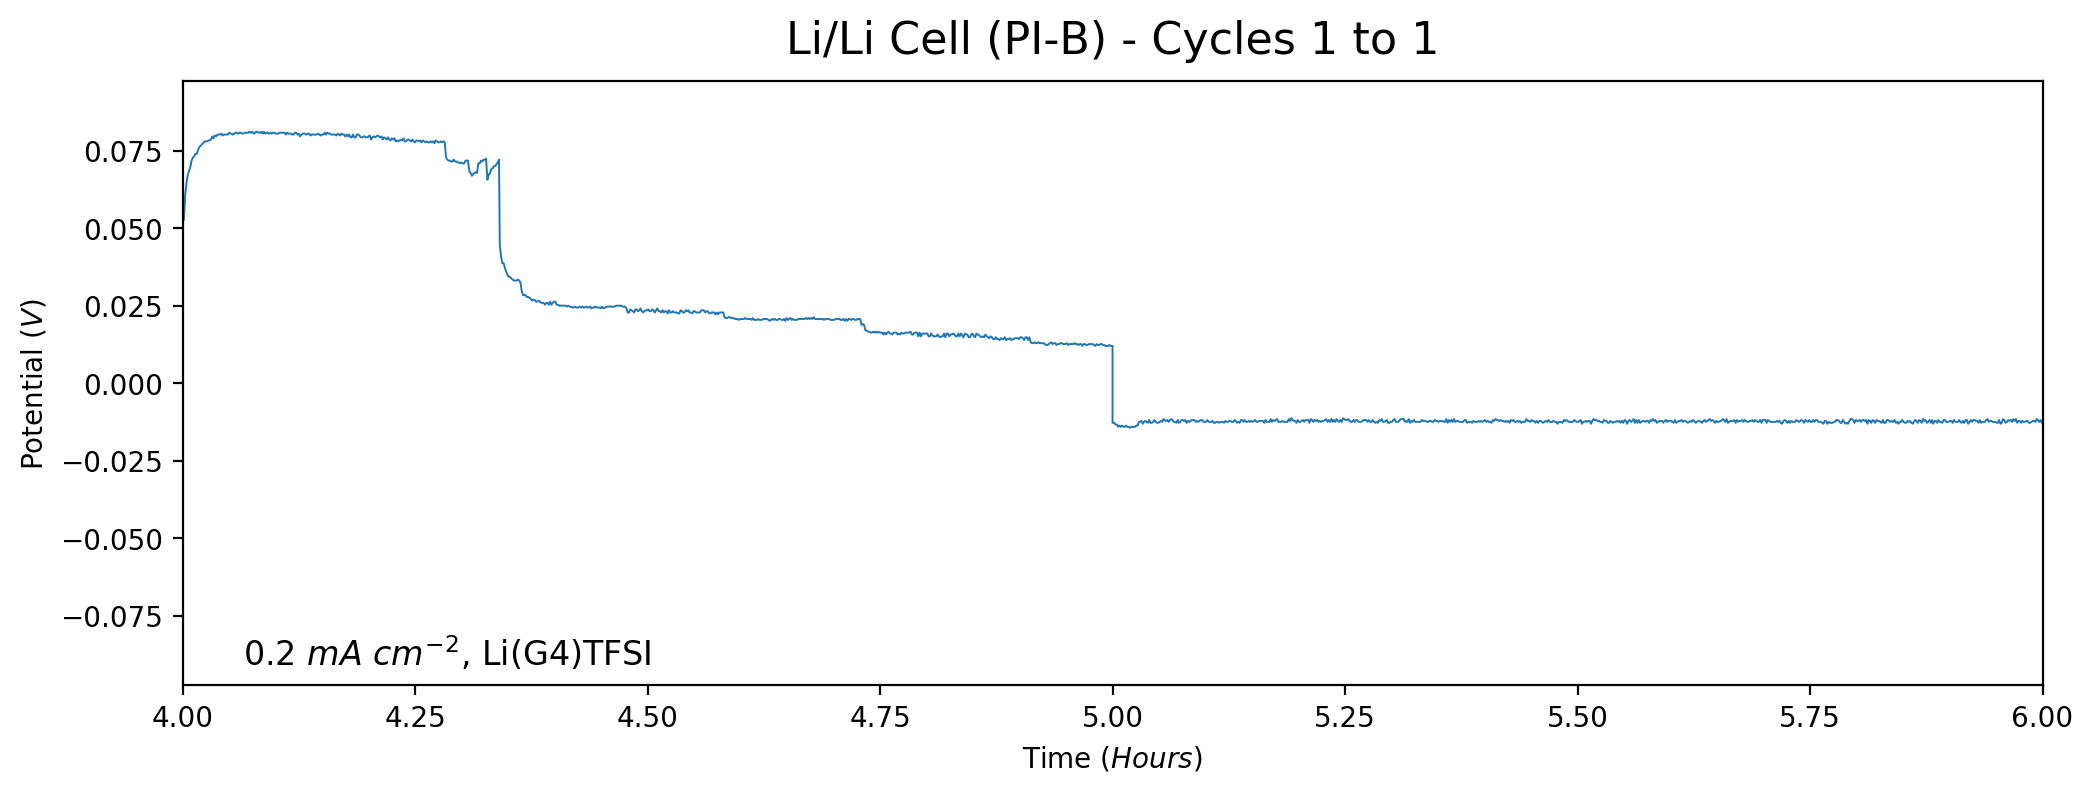

In [6]:
# plotting a cycle range
start_cycle = 1
end_cycle = 1

range_data, label = batt_cycle.cycle_range_data(sample, sample_indeces, start_cycle, end_cycle)

fig = plt.figure(figsize=(12,4), dpi=200)
ax = fig.add_subplot(111)
ax.set_title('Li/Li Cell ({}) - '.format(data_file[27:-12])+label, fontsize=16, pad=10)
ax.set_xlabel('Time ($Hours$)')
ax.set_ylabel('Potential ($V$)')
# ax.set_ylim(-0.5, 0.5)
ax.set_ylim(-abs(max(range_data['voltage'], key=abs)*1.2),
         abs(max(range_data['voltage'], key=abs)*1.2))
ax.set_xlim(min(range_data['time_hours']), max(range_data['time_hours']))
# ax.yaxis.grid(True)
ax.text(0.15, 0.15, '0.2 $mA$ $cm^{-2}$, Li(G4)TFSI', transform=fig.transFigure, fontsize=12)

ax.plot(range_data['time_hours'], range_data['voltage'], linewidth=0.7)

filename = '{} - '.format(data_file[27:-12])+label+'.png'
plt.savefig('./Figures/'+filename)
# plt.show()

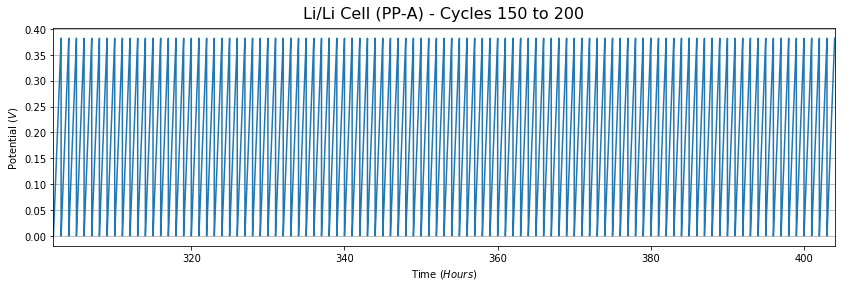

In [52]:
# plotting a cycle range (capacity)
start_cycle = 150
end_cycle = 200

range_data, label = batt_cycle.cycle_range_data(sample, sample_indeces, start_cycle, end_cycle)

plt.figure(figsize=(14,4))
plt.title('Li/Li Cell ({}) - '.format(data_file[27:-12])+label, fontsize=16, pad=10)
plt.xlabel('Time ($Hours$)')
plt.ylabel('Potential ($V$)')
# plt.ylim(-abs(max(range_data['voltage'], key=abs)*1.1),
#          abs(max(range_data['voltage'], key=abs)*1.1))
plt.xlim(min(range_data['time_hours']), max(range_data['time_hours']))
plt.gca().yaxis.grid(True)

plt.plot(range_data['time_hours'], range_data['capacity'])

plt.show()

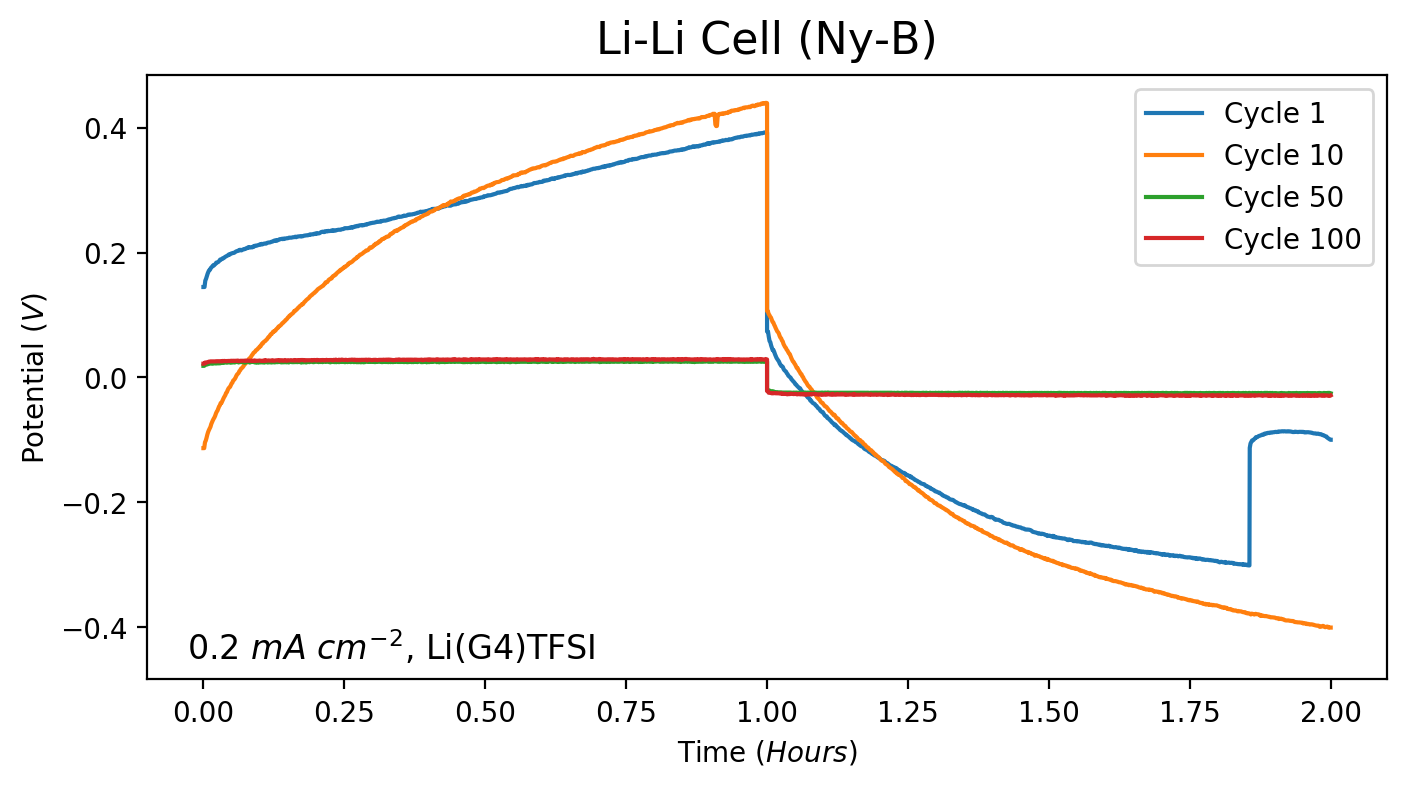

In [170]:
# plotting a stacked cycles

range_data1, label1 = batt_cycle.cycle_range_data(sample, sample_indeces, 1)
range_data2, label2 = batt_cycle.cycle_range_data(sample, sample_indeces, 10)
range_data3, label3 = batt_cycle.cycle_range_data(sample, sample_indeces, 50)
range_data4, label4 = batt_cycle.cycle_range_data(sample, sample_indeces, 100)

range_data1['time_hours'] = range_data1['time_hours'] - min(range_data1['time_hours'])
range_data2['time_hours'] = range_data2['time_hours'] - min(range_data2['time_hours'])
range_data3['time_hours'] = range_data3['time_hours'] - min(range_data3['time_hours'])
range_data4['time_hours'] = range_data4['time_hours'] - min(range_data4['time_hours'])

fig = plt.figure(figsize=(8,4), dpi=200)
ax = fig.add_subplot(111)

ax.set_title('Li-Li Cell ({})'.format(data_file[27:-12]), fontsize=16, pad=8)
ax.set_xlabel('Time ($Hours$)')
ax.set_ylabel('Potential ($V$)')
ax.set_ylim(-abs(max(range_data2['voltage'], key=abs)*1.1),
         abs(max(range_data2['voltage'], key=abs)*1.1))
# plt.grid()
ax.text(0.15, 0.15, '0.2 $mA$ $cm^{-2}$, Li(G4)TFSI', transform=fig.transFigure, fontsize=12)

ax.plot(range_data1['time_hours'], range_data1['voltage'], label='{}'.format(label1))
ax.plot(range_data2['time_hours'], range_data2['voltage'], label='{}'.format(label2))
ax.plot(range_data3['time_hours'], range_data3['voltage'], label='{}'.format(label3))
ax.plot(range_data4['time_hours'], range_data4['voltage'], label='{}'.format(label4))

ax.legend()
filename = '{}_'.format(data_file[27:-12])+'select_cycles.png'
plt.savefig(filename)
# plt.show()

In [16]:
data_file1 = '../Data/Li-Li/Data_2_21_19/PP-A_data.pickle'
sample_data1 = pickle.load(open(data_file1, 'rb'))
sample1, sample_indeces1 = sample_data1
sample1['time_hours'] = sample1['time_sec']/3600

data_file2 = '../Data/Li-Li/Data_2_21_19/PEK-A_data.pickle'
sample_data2 = pickle.load(open(data_file2, 'rb'))
sample2, sample_indeces2 = sample_data2
sample2['time_hours'] = sample2['time_sec']/3600

data_file3 = '../Data/Li-Li/Data_2_21_19/PEJ-A_data.pickle'
sample_data3 = pickle.load(open(data_file3, 'rb'))
sample3, sample_indeces3 = sample_data3
sample3['time_hours'] = sample3['time_sec']/3600

data_file4 = '../Data/Li-Li/Data_2_21_19/Ny-A_data.pickle'
sample_data4 = pickle.load(open(data_file4, 'rb'))
sample4, sample_indeces4 = sample_data4
sample4['time_hours'] = sample4['time_sec']/3600

# data_file5 = '../Data/Li-Li/Data_3_15_19/PI-D_data.pickle'
# sample_data5 = pickle.load(open(data_file5, 'rb'))
# sample5, sample_indeces5 = sample_data5
# sample5['time_hours'] = sample5['time_sec']/3600

In [17]:
range_data1, label1 = batt_cycle.cycle_range_data(sample1, sample_indeces1, 1, 30)
range_data2, label2 = batt_cycle.cycle_range_data(sample2, sample_indeces2, 1, 30)
range_data3, label3 = batt_cycle.cycle_range_data(sample3, sample_indeces3, 1, 30)
range_data4, label4 = batt_cycle.cycle_range_data(sample4, sample_indeces4, 1, 30)
# range_data5, label5 = batt_cycle.cycle_range_data(sample5, sample_indeces4, 1, 30)

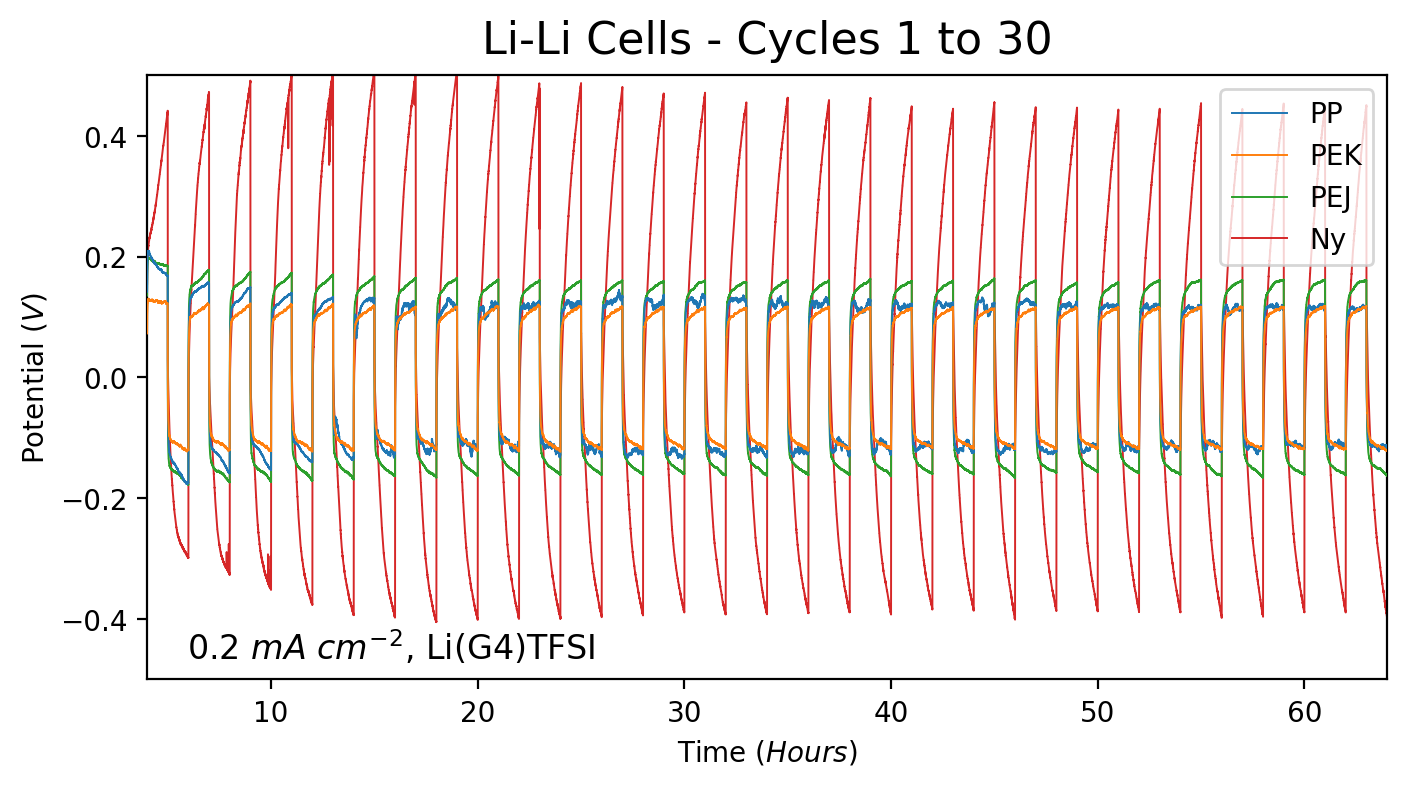

In [18]:
fig = plt.figure(figsize=(8,4), dpi=200)
ax = fig.add_subplot(111)

ax.set_title('Li-Li Cells - Cycles 1 to 30', fontsize=16, pad=8)
ax.set_xlabel('Time ($Hours$)')
ax.set_ylabel('Potential ($V$)')
# ax.set_ylim(-abs(max(range_data4['voltage'], key=abs)*1.1),
#          abs(max(range_data4['voltage'], key=abs)*1.1))
ax.set_ylim(-0.5, 0.5)
ax.set_xlim(min(range_data1['time_hours']), max(range_data1['time_hours']))
# plt.grid()
ax.text(0.15, 0.15, '0.2 $mA$ $cm^{-2}$, Li(G4)TFSI', transform=fig.transFigure, fontsize=12)

ax.plot(range_data1['time_hours'], range_data1['voltage'], label='PP', linewidth=0.7, zorder=4)
ax.plot(range_data2['time_hours'], range_data2['voltage'], label='PEK', linewidth=0.7, zorder=5)
ax.plot(range_data3['time_hours'], range_data3['voltage'], label='PEJ', linewidth=0.7, zorder=3)
ax.plot(range_data4['time_hours'], range_data4['voltage'], label='Ny', linewidth=0.7, zorder=2)
# ax.plot(range_data5['time_hours'], range_data5['voltage'], label='PI', linewidth=0.7, zorder=1)

ax.legend(loc=1)
# filename = '{}_'.format(data_file[27:-12])+'select_cycles.png'
plt.savefig('Li-Li_comparison2.png')
# plt.show()